## Import libraries and load datasets

In [1]:
import pandas as pd


In [6]:
data = pd.read_csv('../data/clean_hcmc_waq.csv')

In [7]:
data.head()

,date_time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,cloud_cover,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,weather_status
0,2022-10-01 07:00:00,25.511000,94.49476,24.561,31.543438,1.3,44.700000,0.179606,2.902413,209.74480,61.2,42.1,1123.0,50.80,11.50,4.0,73.652490,Light Rain
1,2022-10-01 08:00:00,26.411001,88.26100,24.311,31.320229,0.6,55.500000,0.403905,9.504272,232.69597,36.9,24.9,906.0,43.05,11.25,14.0,76.471634,Moderate Drizzle
2,2022-10-01 09:00:00,26.911001,88.03870,24.761,32.211530,0.7,46.200005,0.423807,8.788720,214.99210,28.0,18.5,598.0,31.95,10.90,27.0,77.597520,Moderate Drizzle
3,2022-10-01 10:00:00,28.011000,85.29904,25.311,33.920822,0.6,100.000000,0.555415,7.072878,194.74360,24.2,15.9,281.0,19.70,10.50,48.0,78.182625,Moderate Drizzle
4,2022-10-01 11:00:00,29.011000,78.12226,24.811,34.491055,0.4,100.000000,0.875935,7.754637,201.80147,26.0,17.1,213.0,14.25,10.50,67.0,78.430855,Light Drizzle


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17544 entries, 0 to 17543
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date_time                17544 non-null  object 
 1   temperature_2m           17544 non-null  float64
 2   relative_humidity_2m     17544 non-null  float64
 3   dew_point_2m             17544 non-null  float64
 4   apparent_temperature     17544 non-null  float64
 5   precipitation            17544 non-null  float64
 6   cloud_cover              17544 non-null  float64
 7   vapour_pressure_deficit  17544 non-null  float64
 8   wind_speed_10m           17544 non-null  float64
 9   wind_direction_10m       17544 non-null  float64
 10  pm10                     17544 non-null  float64
 11  pm2_5                    17544 non-null  float64
 12  carbon_monoxide          17544 non-null  float64
 13  nitrogen_dioxide         17544 non-null  float64
 14  sulphur_dioxide       

In [40]:
X = pd.to_datetime(data['date_time'])
y = data['us_aqi']

In [41]:
X

0       2022-10-01 07:00:00
1       2022-10-01 08:00:00
2       2022-10-01 09:00:00
3       2022-10-01 10:00:00
4       2022-10-01 11:00:00
                ...        
17539   2024-10-01 02:00:00
17540   2024-10-01 03:00:00
17541   2024-10-01 04:00:00
17542   2024-10-01 05:00:00
17543   2024-10-01 06:00:00
Name: date_time, Length: 17544, dtype: datetime64[ns]

In [44]:
a = X[0]
a.dt.date

AttributeError: 'Timestamp' object has no attribute 'dt'

In [23]:
import matplotlib.pyplot as plt

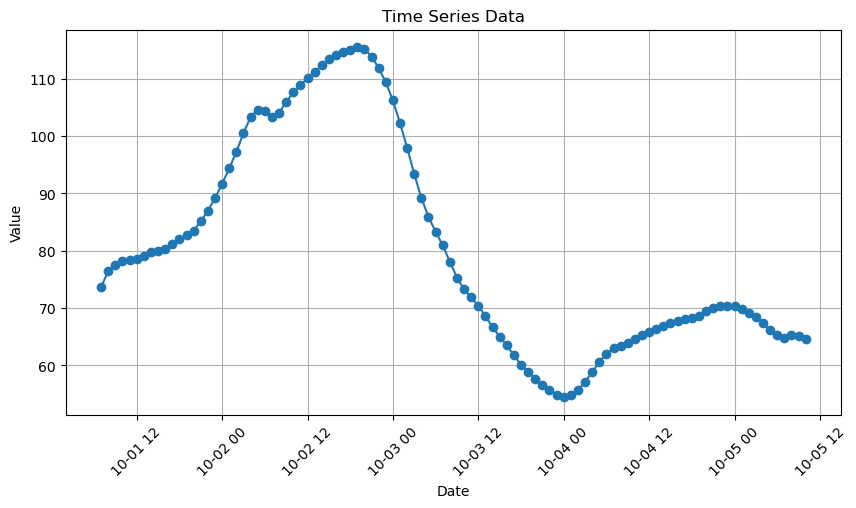

In [45]:
plt.figure(figsize=(10,5))
plt.plot(X[:100],y[:100], marker='o', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.xticks(rotation=45)  # Xoay nhãn ngày để dễ đọc hơn
plt.grid(True)
plt.show()

## Build model to forecast the air quality in HoChiMinh city (us_aqi) according to date and time

In [14]:
dataset = pd.DataFrame()
dataset['ds'] = data['date_time']
dataset['y'] = data['us_aqi']
dataset

,ds,y
0,2022-10-01 07:00:00,73.652490
1,2022-10-01 08:00:00,76.471634
2,2022-10-01 09:00:00,77.597520
3,2022-10-01 10:00:00,78.182625
4,2022-10-01 11:00:00,78.430855
...,...,...
17539,2024-10-01 02:00:00,85.053185
17540,2024-10-01 03:00:00,82.641846
17541,2024-10-01 04:00:00,80.824470
17542,2024-10-01 05:00:00,79.406030


In [15]:
!pip install prophet


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from prophet import Prophet

In [16]:
model = Prophet()
model.fit(dataset)

19:52:19 - cmdstanpy - INFO - Chain [1] start processing
19:52:25 - cmdstanpy - INFO - Chain [1] done processing


#### Create datetime for future prediction

In [18]:
future_data = model.make_future_dataframe(periods=365, freq='H')
future_data

c:\Users\loc11\anaconda3\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
0,2022-10-01 07:00:00
1,2022-10-01 08:00:00
2,2022-10-01 09:00:00
3,2022-10-01 10:00:00
4,2022-10-01 11:00:00
...,...
17904,2024-10-16 07:00:00
17905,2024-10-16 08:00:00
17906,2024-10-16 09:00:00
17907,2024-10-16 10:00:00


In [19]:
aqi_forecast = model.predict(future_data)

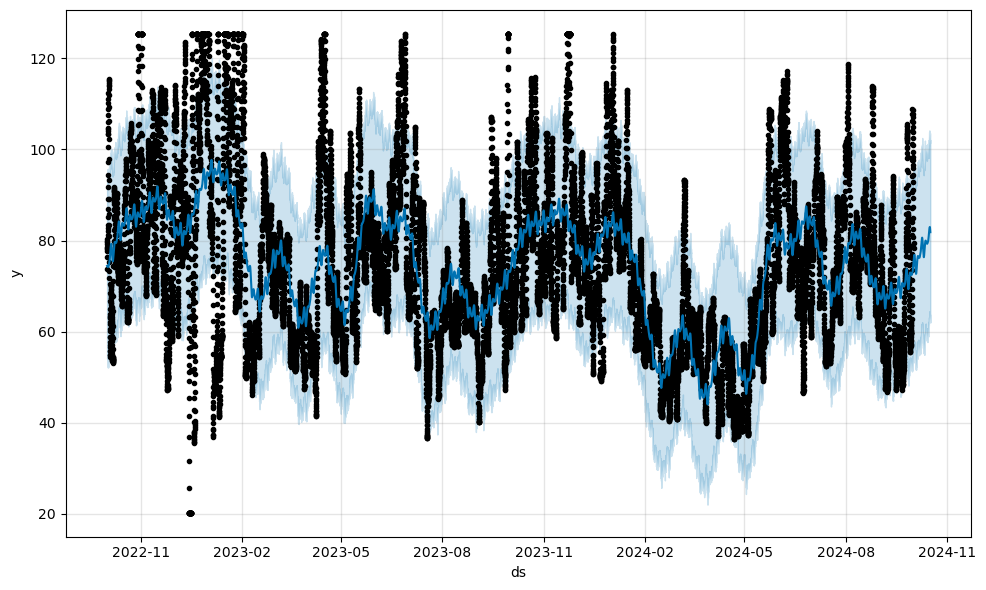

In [20]:
figure = model.plot(aqi_forecast)

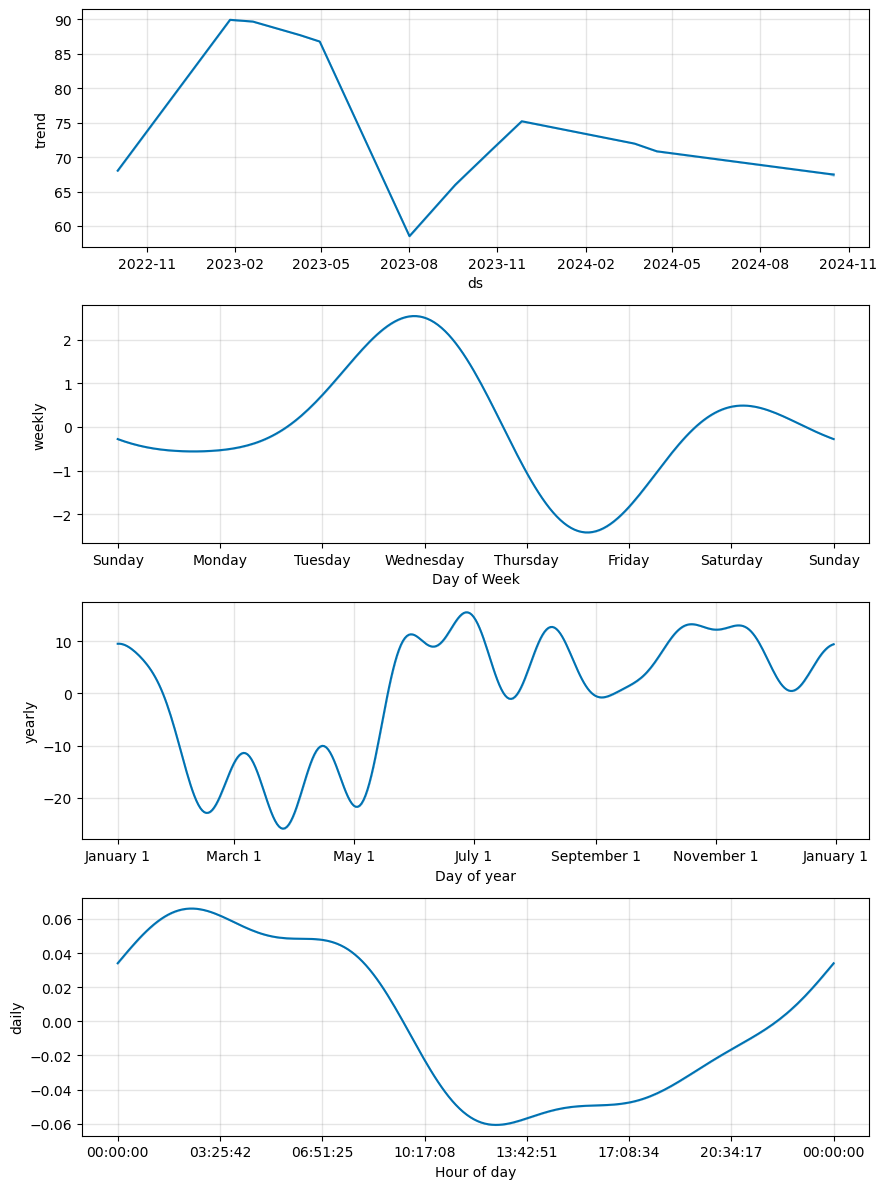

In [21]:
fig2 = model.plot_components(aqi_forecast)

In [46]:
data.head()

,date_time,temperature_2m,relative_humidity_2m,dew_point_2m,apparent_temperature,precipitation,cloud_cover,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,pm10,pm2_5,carbon_monoxide,nitrogen_dioxide,sulphur_dioxide,ozone,us_aqi,weather_status
0,2022-10-01 07:00:00,25.511000,94.49476,24.561,31.543438,1.3,44.700000,0.179606,2.902413,209.74480,61.2,42.1,1123.0,50.80,11.50,4.0,73.652490,Light Rain
1,2022-10-01 08:00:00,26.411001,88.26100,24.311,31.320229,0.6,55.500000,0.403905,9.504272,232.69597,36.9,24.9,906.0,43.05,11.25,14.0,76.471634,Moderate Drizzle
2,2022-10-01 09:00:00,26.911001,88.03870,24.761,32.211530,0.7,46.200005,0.423807,8.788720,214.99210,28.0,18.5,598.0,31.95,10.90,27.0,77.597520,Moderate Drizzle
3,2022-10-01 10:00:00,28.011000,85.29904,25.311,33.920822,0.6,100.000000,0.555415,7.072878,194.74360,24.2,15.9,281.0,19.70,10.50,48.0,78.182625,Moderate Drizzle
4,2022-10-01 11:00:00,29.011000,78.12226,24.811,34.491055,0.4,100.000000,0.875935,7.754637,201.80147,26.0,17.1,213.0,14.25,10.50,67.0,78.430855,Light Drizzle


In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [54]:
label_encoder = LabelEncoder()
data['weather_label'] = label_encoder.fit_transform(data['weather_status'])

In [58]:
label_encoder.classes_

array(['Clear Sky', 'Dense Drizzle', 'Heavy Rain', 'Light Drizzle',
       'Light Rain', 'Mainly Clear', 'Moderate Drizzle', 'Moderate Rain',
       'Overcast', 'Partly Cloudy'], dtype=object)

In [56]:
data['weather_status'].unique()

array(['Light Rain', 'Moderate Drizzle', 'Light Drizzle', 'Moderate Rain',
       'Overcast', 'Heavy Rain', 'Dense Drizzle', 'Partly Cloudy',
       'Mainly Clear', 'Clear Sky'], dtype=object)

In [59]:
data['weather_label'].value_counts()

weather_label
5    7567
0    3353
3    2797
9    1236
8     898
6     600
7     449
4     394
1     162
2      88
Name: count, dtype: int64